<a href="https://colab.research.google.com/github/Fres02/Machine-Learning-Projects/blob/main/Calories_Burnt_Prediction_EE5235_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calories Burnt Prediction - Machine Learning Model

EE5235 - Group 35

---

EG/2021/4588


EG/2021/4770


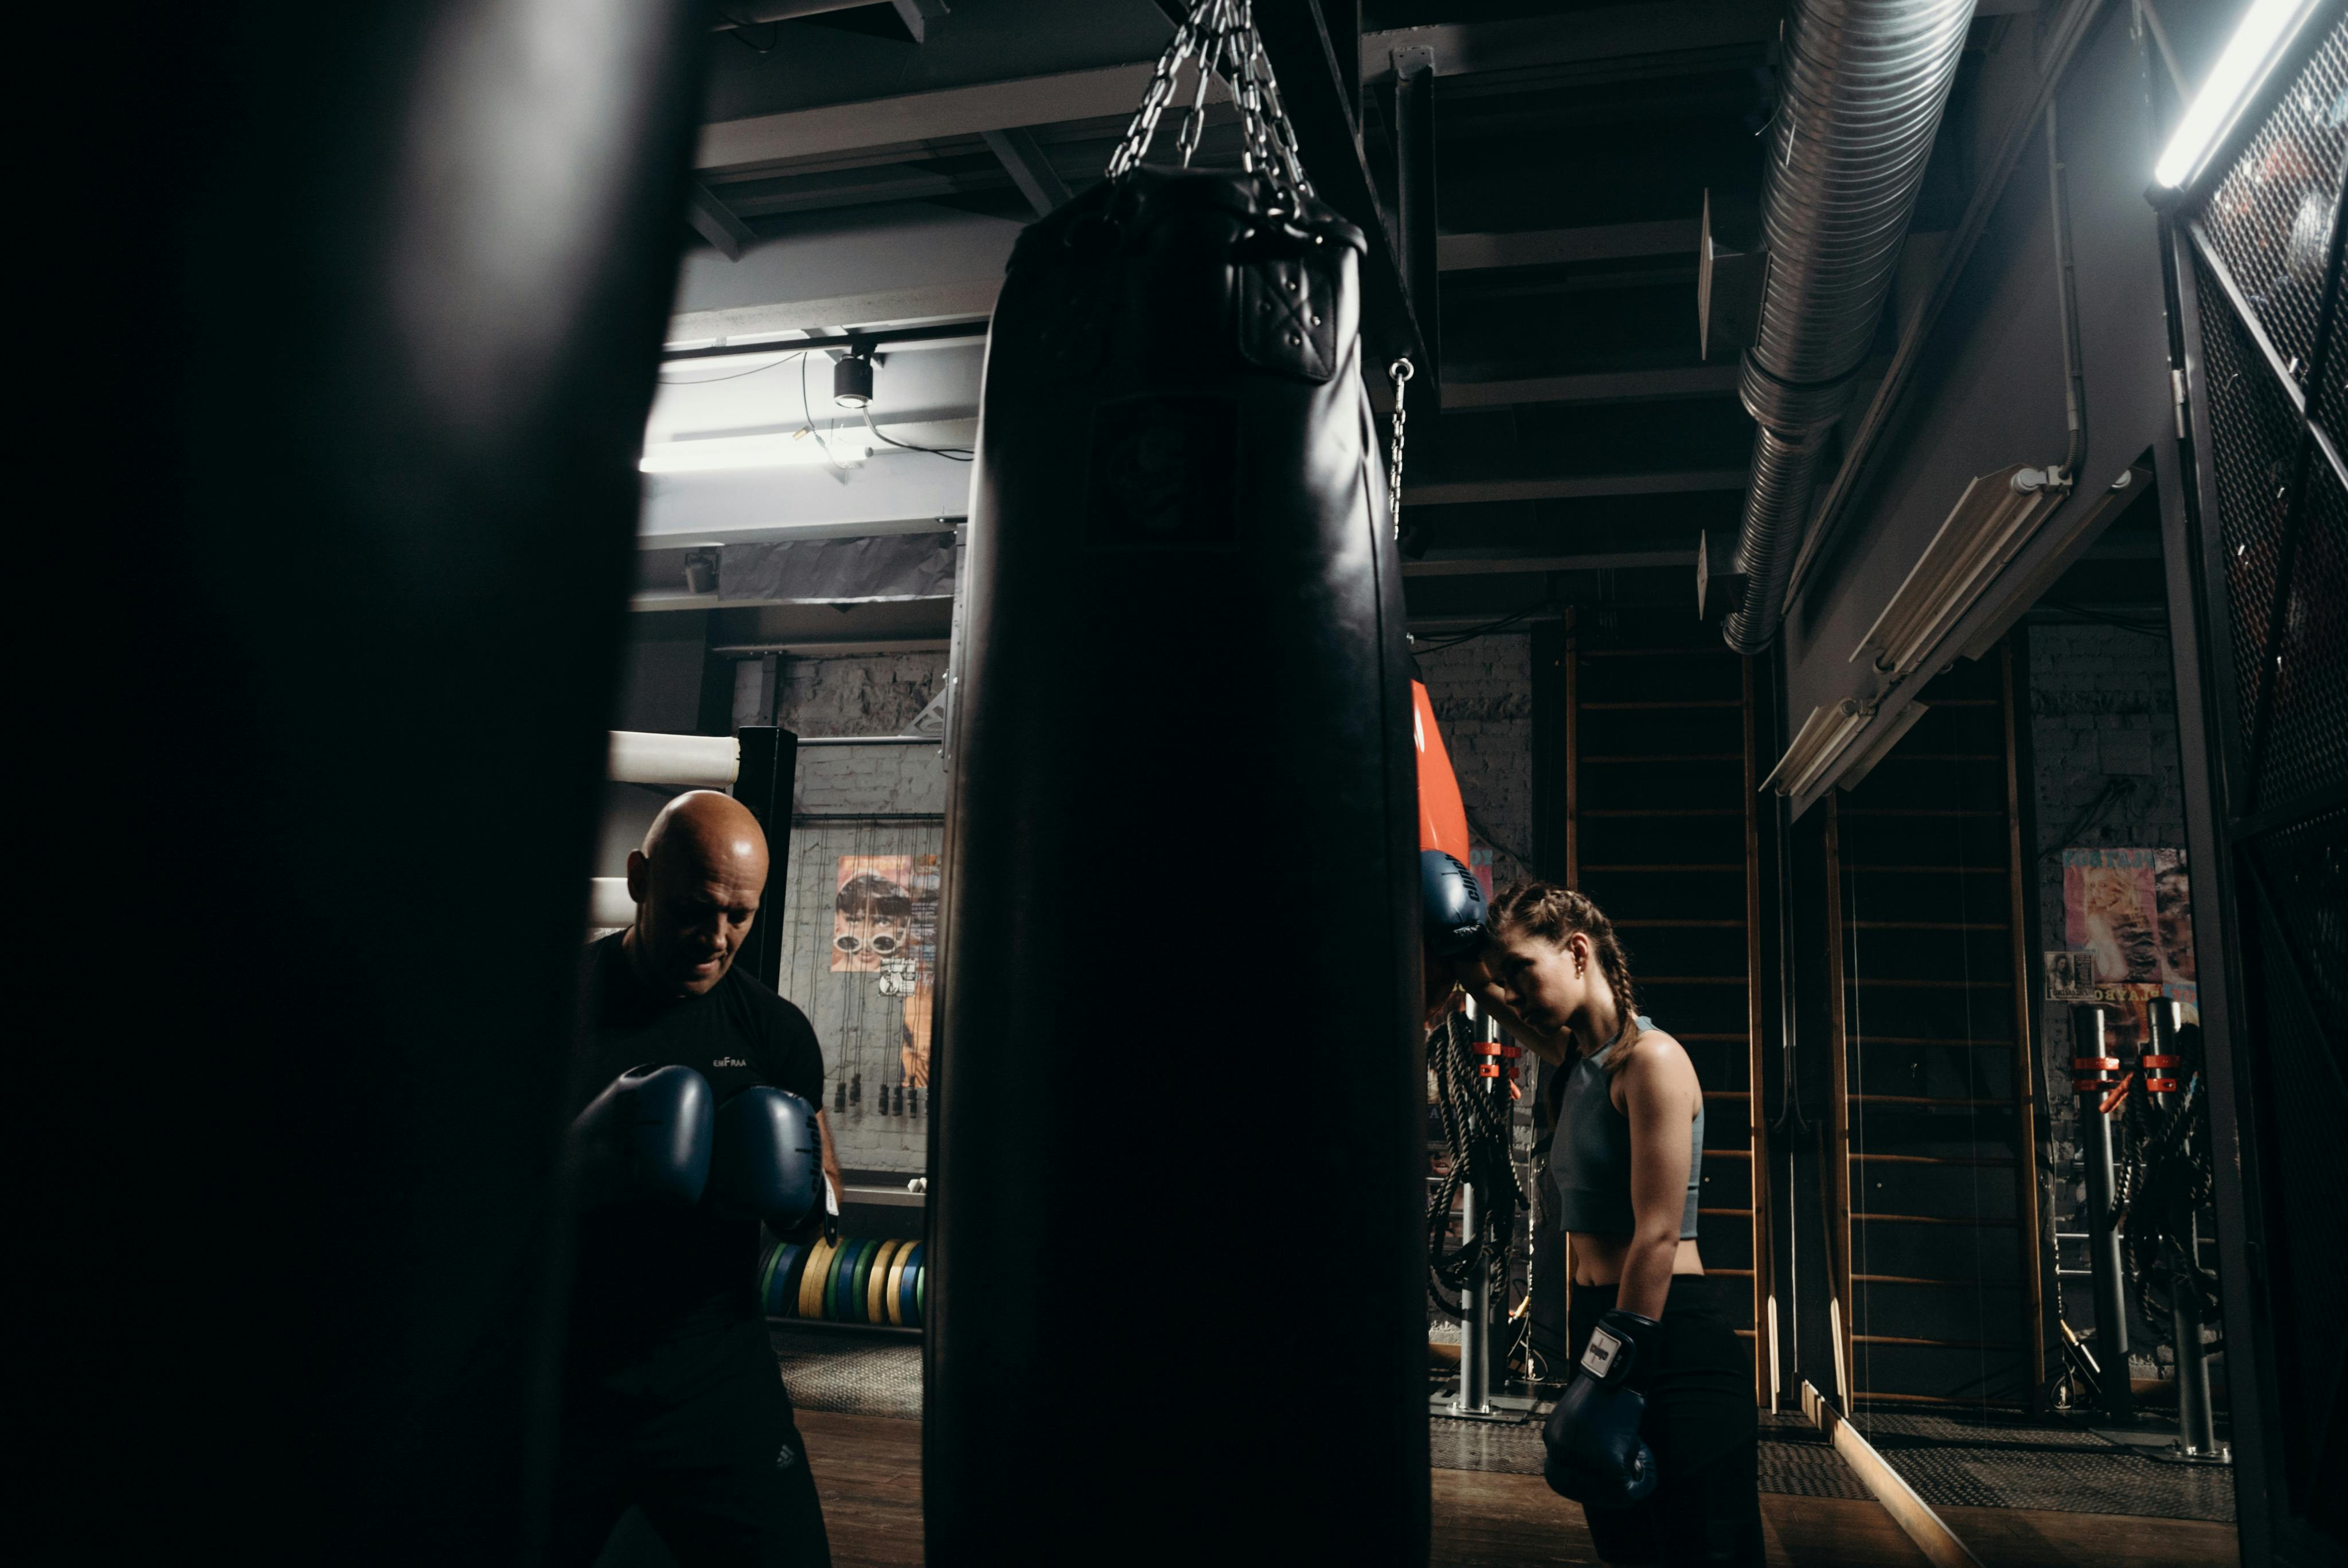


#**Wouldn't it be better to know the calories you have burnt during workouts rather than blindly exercising for hours?**

We've got you covered. We are going to develop a machine learning model to accurately estimate the calories burnt during gym workouts. We analyze the data such as, workout duration, age, weight, heart rate, to predict the amount of calories burnt during the workout session.

## **Step 1 : Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## **Step 2 : Load Dataset**

In [6]:
# Load exercise data
exercise_data = pd.read_csv('sample_data/Exercise.csv')
print("Exercise Data:")
display(exercise_data.head())

Exercise Data:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# Load calories data
calories_data = pd.read_csv('sample_data/Calories.csv')
print("\nCalories Data:")
display(calories_data.head())


Calories Data:


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


## **Step 3 : Combine Datasets**

We need to combine these two datasets.

In [8]:
# Column wise concatanation
Calories_data = pd.concat([exercise_data, calories_data['Calories']], axis=1)

In [9]:
# Display the combined dataset
Calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Here our target variable is Calories.

## **Step 4 : Analyze the Dataset**

In [10]:
# display the no. of rows and no. of columns
Calories_data.shape

(15000, 9)

In [11]:
# display more information about the dataset
print("\nDataset Info:")
Calories_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
print("\nSummary Statistics:")
display(Calories_data.describe())


Summary Statistics:


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
# checking for null values
Calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


There are no null values or missing values in this dataset.

In [14]:
# checking for duplicates
Calories_data.duplicated().sum()

0


There are no duplicate examples in this dataset.

Drop User_ID column since that is not useful for prediction.

In [15]:
Calories_data = Calories_data.drop(columns=['User_ID'])

In [16]:
Calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
#checking for duplicates again
Calories_data.duplicated().sum()

1

In [18]:
# To find duplicate rows
duplicates = Calories_data[Calories_data.duplicated()]

# To display duplicates
print(duplicates)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
12852  female   28   164.0    59.0       9.0        90.0       39.5      40.0


In [19]:
Calories_data = Calories_data.drop_duplicates()

In [20]:
#checking for duplicates again
Calories_data.duplicated().sum()

0

Seperate the Features and Target Variables


In [21]:
X = Calories_data.drop(columns=['Calories'])
y = Calories_data['Calories']

In [22]:
print("\nFeature:")
display(X.head())


Feature:


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [23]:
print("\nTarget:")
display(y.head())


Target:


,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


## **Step 5 : Exploratory Data Analysis (EDA)**

Visualize the distribution of key variables and correlations.

In [24]:
#Load the dimensions of the Features array
print("\nFeature Data Shape:")
print(X.shape)


Feature Data Shape:
(14999, 7)


In [25]:
#Load the dimensions of the Target array
print("\nTarget Data Shape:")
print(y.shape)


Target Data Shape:
(14999,)


In [26]:
print( "\nFeature Data Info:")
print(X.info())


Feature Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14999 non-null  object 
 1   Age         14999 non-null  int64  
 2   Height      14999 non-null  float64
 3   Weight      14999 non-null  float64
 4   Duration    14999 non-null  float64
 5   Heart_Rate  14999 non-null  float64
 6   Body_Temp   14999 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 937.4+ KB
None


In [27]:
#Load information on target
print("\nTarget Data Info:")
print(y.info())


Target Data Info:
<class 'pandas.core.series.Series'>
Index: 14999 entries, 0 to 14999
Series name: Calories
Non-Null Count  Dtype  
--------------  -----  
14999 non-null  float64
dtypes: float64(1)
memory usage: 234.4 KB
None


## **Step 6 :  Split Data into Train, Validation, and Test Sets**

In [28]:
# Split the data into training + validation (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# dilpay the shape of train and test sets
print("\nTrain and Test Data Shapes:")
print(f"X_train: {X_train.shape},  X_test: {X_test.shape}")
print(f"y_train: {y_train.shape},  y_test: {y_test.shape}")


Train and Test Data Shapes:
X_train: (11999, 7),  X_test: (3000, 7)
y_train: (11999,),  y_test: (3000,)


## **Step 7: Data Vizualization**

In [30]:
# to add default aesthetic settings to plots
sns.set()

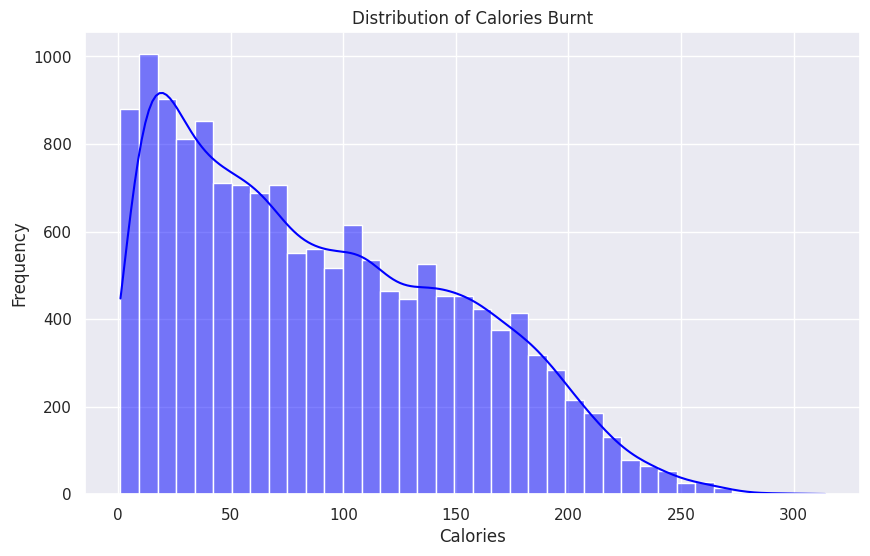

In [31]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribution of Calories Burnt')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

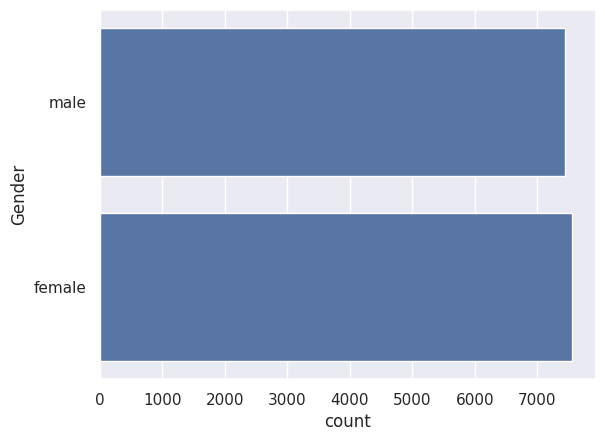

In [32]:
# Distribution of Gender column
sns.countplot(X['Gender'])

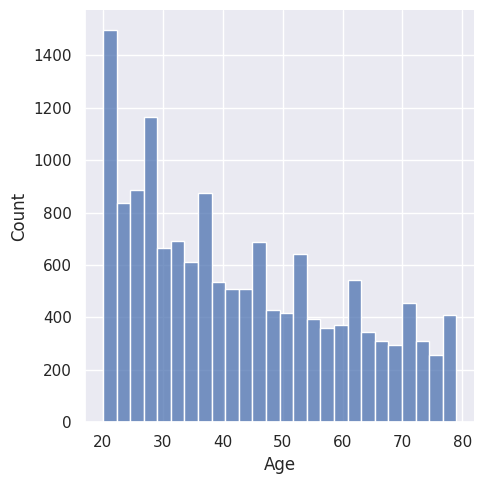

In [75]:
# distribution of Age column
sns.displot(X['Age'])

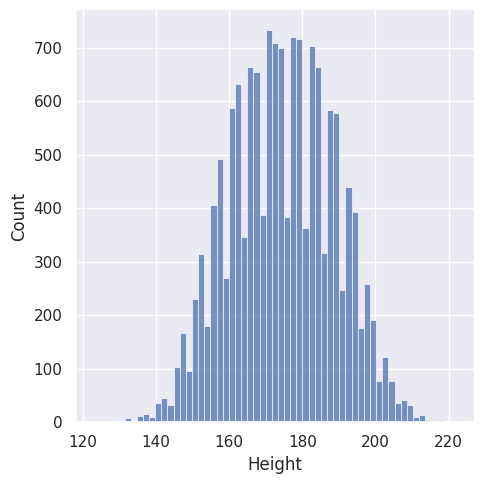

In [76]:
# distribution of Height column
sns.displot(X['Height'])

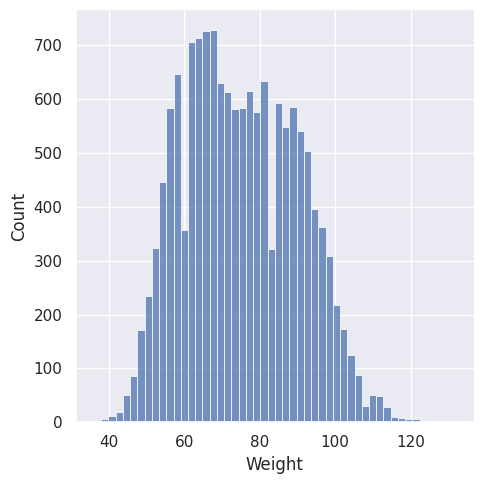

In [77]:
# distribution of Weight column
sns.displot(X['Weight'])

## **Step 8 : Data Preprocessing and Feature Selection**

In [36]:
#checking for null values in train set
X_train.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [37]:
#checking for duplicates in train set
X_train.duplicated().sum()

0

In [38]:
#display the information about training set
print("\nFeature Data Info of Train Set:")
print(X_train.info())


Feature Data Info of Train Set:
<class 'pandas.core.frame.DataFrame'>
Index: 11999 entries, 9838 to 7270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      11999 non-null  object 
 1   Age         11999 non-null  int64  
 2   Height      11999 non-null  float64
 3   Weight      11999 non-null  float64
 4   Duration    11999 non-null  float64
 5   Heart_Rate  11999 non-null  float64
 6   Body_Temp   11999 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 749.9+ KB
None


Now there are


*   No null values
*   No duplicates

in the training set features.

In [39]:
#checking for null values in test set
X_test.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


There are no null values in the test set

In [40]:
#checking for duplicates in test set
X_test.duplicated().sum()

0

There are no duplicates in the test set also.

Categorical data should be handled.

In [41]:
print("\Features Info:")
X.info()

\Features Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14999 non-null  object 
 1   Age         14999 non-null  int64  
 2   Height      14999 non-null  float64
 3   Weight      14999 non-null  float64
 4   Duration    14999 non-null  float64
 5   Heart_Rate  14999 non-null  float64
 6   Body_Temp   14999 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 937.4+ KB


Since there is categorical data, in Gender field. It should be converted to a numerical value.

In [42]:
#perform label encoding in train set
X_train.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<ipython-input-42-0cf5ee2677c9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [43]:
print("\nTrain set after handling categorical data:")
X_train.head()


Train set after handling categorical data:


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9838,0,41,178.0,83.0,25.0,115.0,40.5
7689,0,52,176.0,77.0,26.0,112.0,40.8
6557,1,22,176.0,66.0,12.0,89.0,40.3
6872,1,52,152.0,56.0,24.0,97.0,40.8
820,1,32,144.0,49.0,5.0,90.0,39.0


In [79]:
#perform label encoding in test set
X_test['Gender'] = X_test['Gender'].replace({'male': 0, 'female': 1}).astype(int)

In [45]:
print("\nTest set after handling categorical data:")
X_test.head()


Test set after handling categorical data:


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
6723,0,41,184.0,91.0,27.0,111.0,41.2
6473,0,68,158.0,67.0,26.0,113.0,40.9
4679,1,50,175.0,77.0,2.0,77.0,38.4
862,0,35,182.0,89.0,24.0,108.0,40.8
7286,0,22,194.0,92.0,19.0,97.0,40.5


The Genger value = 1 means 'male' and value = 0 means 'female'.
Now there are only numerical values for all features

Plotting the Correlation Heat Map

In [78]:
#perform label encoding in whole dataset to fet the correlation heat map
Calories_data['Gender'] = Calories_data['Gender'].replace({'male': 0, 'female': 1}).astype(int)

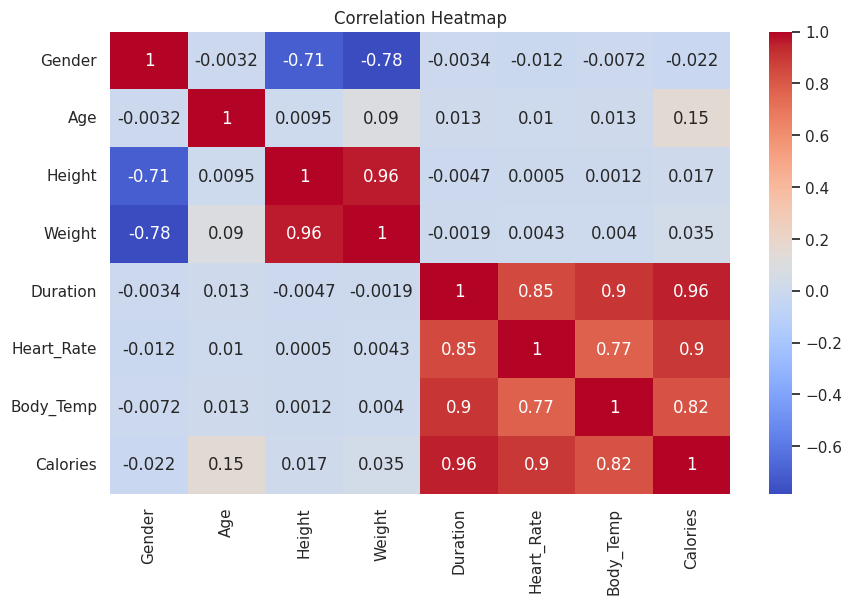

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(Calories_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Selection should be done.

Height and weight have a correlation of 0.96
This indicates a very strong positive relationship between the two features.

This means that they are closely related and likely contain redundant information. Since this is a calories burnt prediction, we can remove the height parameter by keeping weight as a feature.

In [48]:
#drop height column
X_train = X_train.drop(columns=['Height'])

In [49]:
X_train.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp
9838,0,41,83.0,25.0,115.0,40.5
7689,0,52,77.0,26.0,112.0,40.8
6557,1,22,66.0,12.0,89.0,40.3
6872,1,52,56.0,24.0,97.0,40.8
820,1,32,49.0,5.0,90.0,39.0


In [50]:
#drop height column
X_test = X_test.drop(columns=['Height'])

In [51]:
X_test.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp
6723,0,41,91.0,27.0,111.0,41.2
6473,0,68,67.0,26.0,113.0,40.9
4679,1,50,77.0,2.0,77.0,38.4
862,0,35,89.0,24.0,108.0,40.8
7286,0,22,92.0,19.0,97.0,40.5


Feature Scaling should be done next

In [52]:
# Apply scaling to the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Convert X_train and X_test back to DataFrames with column names
X_train = pd.DataFrame(X_train, columns=['Gender', 'Age', 'Weight', 'Duration', 'Heart_rate', 'Body_Temp'])
X_test = pd.DataFrame(X_test, columns=['Gender', 'Age', 'Weight', 'Duration', 'Heart_rate', 'Body_Temp'])


In [54]:
print("\nScaled Feature Data in Train Set:")
X_train.head()


Scaled Feature Data in Train Set:


,Gender,Age,Weight,Duration,Heart_rate,Body_Temp
0,-1.007277,-0.105092,0.536212,1.142189,2.035836,0.614605
1,-1.007277,0.542661,0.137694,1.262131,1.722958,0.997663
2,0.992775,-1.223938,-0.592923,-0.417065,-0.675779,0.359232
3,0.992775,0.542661,-1.257119,1.022246,0.158564,0.997663
4,0.992775,-0.635071,-1.722057,-1.256663,-0.571486,-1.300688


In [55]:
print("\nScaled Feature Data in Test Set:")
X_test.head()


Scaled Feature Data in Test Set:


,Gender,Age,Weight,Duration,Heart_rate,Body_Temp
0,-1.007277,-0.105092,1.067569,1.382074,1.618665,1.508408
1,-1.007277,1.484847,-0.526503,1.262131,1.827251,1.125349
2,0.992775,0.424888,0.137694,-1.616491,-1.927293,-2.066805
3,-1.007277,-0.458412,0.934730,1.022246,1.305786,0.997663
4,-1.007277,-1.223938,1.133989,0.422533,0.158564,0.614605


## **Step 9 : Model Training, Cross Validation, Hyperparameter Tuning and Evaluation**

### XGBoost Model

In [56]:
# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [57]:
# Predict on validation data
y_pred_xgb = xgb_model.predict(X_train)

In [58]:
# Evaluate XGBoost on training data
print("\nXGBoost Model Evaluation (Training Set):")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_xgb):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_xgb):.2f}")
print(f"R^2 Score: {mean_absolute_error(y_train, y_pred_xgb):.2f}")


XGBoost Model Evaluation (Training Set):
Mean Squared Error: 1.55
Mean Absolute Error: 0.91
R^2 Score: 0.91


In [59]:
# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"\nXGBoost Cross-Validation Mean Squared Error (CV=5): {np.mean(-cv_scores_xgb):.2f}")


XGBoost Cross-Validation Mean Squared Error (CV=5): 4.81


### Random Forrest Regressor


In [60]:
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# Predict on train data
y_pred_rf = rf_model.predict(X_train)

In [62]:
# Evaluate Random Forest on validation data
print("\nRandom Forest Evaluation (Validation Set):")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_rf):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_train, y_pred_rf):.2f}")


Random Forest Evaluation (Validation Set):
Mean Squared Error: 1.13
Mean Absolute Error: 0.65
R^2 Score: 1.00


In [63]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"\nRandom Forest Cross-Validation Mean Squared Error (CV=5): {np.mean(-cv_scores_rf):.2f}")


Random Forest Cross-Validation Mean Squared Error (CV=5): 8.87


### **Based on the cross-validation mean squared error (MSE), XGBoost is the better model.**

XGBoost has a lower MSE (4.81) compared to Random Forest (8.87).
A lower MSE indicates that the model's predictions are closer to the actual values, meaning the XGBoost model has better predictive performance in terms of minimizing the error.

But it is clearly visible that there is overfitting in both models as training mean squared error and the testing mean squared error are both not the same. Therefore we have to avoid overfitting.

### Hyperparameter Tuning


Since we selected XGBoost as the best fit model, we have to perform hyperparameter tuning on that model.

In [65]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
Best CV Score: 2.15876284761637


In [67]:
# Evaluate on the training set with the best model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_train)
print(f"\nXGBoost Model Evaluation (Training Set):")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_xgb):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_xgb):.2f}")
print(f"R^2 Score: {r2_score(y_train, y_pred_xgb):.2f}")


XGBoost Model Evaluation (Training Set):
Mean Squared Error: 1.06
Mean Absolute Error: 0.78
R^2 Score: 1.00


In [68]:
# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"\nXGBoost Cross-Validation Mean Squared Error (CV=5): {np.mean(-cv_scores_xgb):.2f}")


XGBoost Cross-Validation Mean Squared Error (CV=5): 2.16


The Training set MSE and Cross validation MSE gap has been reduced by performing the hyperparameter tuning part.

Then we can perform the hyperparameter tuning for the Random Foreset Model also.

In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for Random Forest
param_distributions_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf,
                                      scoring='neg_mean_squared_error', n_iter=50, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best CV Score for Random Forest:", -random_search_rf.best_score_)

# Evaluate on the training set with the best model
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_train)
print(f"\nRandom Forest Model Evaluation (Training Set):")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_rf):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_train, y_pred_rf):.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best CV Score for Random Forest: 12.352609394275134

Random Forest Model Evaluation (Training Set):
Mean Squared Error: 1.62
Mean Absolute Error: 0.77
R^2 Score: 1.00


In [70]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"\nRandom Forest Cross-Validation Mean Squared Error (CV=5): {np.mean(-cv_scores_rf):.2f}")


Random Forest Cross-Validation Mean Squared Error (CV=5): 12.35


After hyperparameter tuning the MSE of the training set is reduced but for the cross validation, the MSE has further increased. SO we have to use the previous model for the Random Forest Regressor

###  Evaluate Models on Test Set

In [71]:
# Predict on test data using XGBoost
y_pred_xgb_test = best_xgb_model.predict(X_test)

In [72]:
# Evaluate XGBoost on test data
print("\nXGBoost Model Evaluation (Test Set):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb_test):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb_test):.2f}")


XGBoost Model Evaluation (Test Set):
Mean Squared Error: 2.27
Mean Absolute Error: 1.03
R^2 Score: 1.00


In [73]:
# Predict on test data using Random Forest
y_pred_rf_test = rf_model.predict(X_test)

In [74]:
# Evaluate Random Forest on test data
print("\nRandom Forest Evaluation (Test Set):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf_test):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf_test):.2f}")


Random Forest Evaluation (Test Set):
Mean Squared Error: 8.15
Mean Absolute Error: 1.71
R^2 Score: 1.00


Both models are performing extremely well, but based on the MSE and MAE, XGBoost is slightly better at making more accurate predictions on the test set, with lower error metrics values.

When we compare the training accuracy and testing accuracy, the XGBoost model has similar accuracies in both cases but in Random Forest model, the training accuracy is much higher than the testing accuracy wich results in a overfitted model.
**XGBoost is the more generalized model.**